First, we'll open a FITS spectrum and an HDF5 spectrum so we can inspect their respective formats.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import h5py
fitsfile = 'FDBinaryRG_7037405v4.fits'
fitsspec = fits.open(fitsfile)
#hdf5file = 'libraries/PHOENIX_TRES_test.hdf5'
hdf5file = 'WASP14-2009-06-14.hdf5'
hdf5spec = h5py.File(hdf5file)

# supposedly astropy can play with HDF5, but I don't believe it yet... may come back to this later
#from astropy.table import Table
#hdf5spec2 = Table.read(hdf5file, path='group/data')

In [2]:
print(hdf5spec)
print(fitsspec)

<HDF5 file "WASP14-2009-06-14.hdf5" (mode r+)>


Let's access the spectral data from the FITS file, assuming it's 1D with a linear wavelength scale. I already know that is the case for this reduced, order-combined, and continuum-normalized spectrum taken with the ARCES spectrograph.

In [3]:
fitsfluxes = fitsspec[0].data
fitshead = fitsspec[0].header
fitsw0 = fitshead['crval1']
fitsdw = fitshead['cdelt1']
fitswaves = np.arange(fitsw0, fitsw0 + fitsdw*len(fitsfluxes), fitsdw)
print(fitswaves)
print(fitsfluxes)
print(len(fitsfluxes), np.min(fitsfluxes), np.max(fitsfluxes))

[ 4905.          4905.04394905  4905.0878981  ...,  8549.87054719
  8549.91449624  8549.95844529]
[ 0.90281551  0.89295845  0.86388501 ...,  0.9269045   0.9269045   0.9269045 ]
82937 0.0730782849943 1.26520500132


OK, so this 1D spectrum contains ~83000 data points and goes from 4905-8550 A. The flux values are all nearly in the 0-1 range, which supports the fact that it's been normalized.
We can also learn fun metadata things about the spectrum from the FITS header. However, if we don't know what all the header entries are called, we can list them before specifying the one we want.

In [4]:
print(list(fitshead.keys()))
print(fitshead['date-obs'])

['SIMPLE', 'BITPIX', 'NAXIS', 'NAXIS1', 'ORIGIN', 'DATE', 'IRAF-TLM', 'OBSERVAT', 'TELESCOP', 'INSTRUME', 'LATITUDE', 'LONGITUD', 'TIMESYS', 'UTC-TAI', 'UT1-TAI', 'LST', 'OBJNAME', 'RADECSYS', 'EQUINOX', 'OBJANGLE', 'RA', 'DEC', 'ARCOFFX', 'ARCOFFY', 'OBJOFFX', 'OBJOFFY', 'CALOFFX', 'CALOFFY', 'BOREOFFX', 'BOREOFFY', 'AIRPRESS', 'HUMIDITY', 'TELAZ', 'TELALT', 'TELFOCUS', 'ZD', 'AIRMASS', 'DATE-OBS', 'EXPTIME', 'DARKTIME', 'MIRROR', 'FILTER', 'SLITFOC', 'CCDTIP', 'CCDTILT', 'CCDFOCUS', 'LAMPW', 'LAMPT', 'IMAGETYP', 'CCDTEMP', 'CCDHEAT', 'FILENAME', 'CCDBIN1', 'CCDBIN2', 'CCDSUM', 'GAIN', 'RDNOISE', 'DETSIZE', 'FIXPIX', 'WCSDIM', 'LTM1_1', 'WAT0_001', 'WAT1_001', 'TRIM', 'ZEROCOR', 'CCDSEC', 'CCDPROC', 'HISTORY', 'APSCATTE', 'BANDID1', 'CTYPE1', 'CDELT1', 'CD1_1', 'UTMIDDLE', 'JD', 'HJD', 'LJD', 'DCLOG1', 'DCLOG2', 'APNUM1', 'DC-FLAG', 'CRVAL1', 'CRPIX1', 'NCOMBINE', 'RV_BF', 'BCV_BF', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
2014-04-22T09:45:11.285


Next, let's figure out how the HDF5 file containing a spectrum is organized. This is one of the example infiles from the Starfish repo for WASP14 taken with the TRES spectrograph.

In [5]:
print(hdf5spec)
print(list(hdf5spec))
print(len(hdf5spec['fls']), len(hdf5spec['sigmas']), len(hdf5spec['wls']))

<HDF5 file "WASP14-2009-06-14.hdf5" (mode r+)>
['fls', 'sigmas', 'wls']
51 51 51


In [6]:
print(hdf5spec['wls'])
print(hdf5spec['wls'][0])
print(hdf5spec['wls'][-1])
print(len(hdf5spec['wls'][0]))

<HDF5 dataset "wls": shape (51, 2298), type "<f8">
[ 3849.90234326  3849.93807054  3849.97379548 ...,  3925.58171402
  3925.61183273  3925.64194883]
[ 8920.84705389  8920.92984178  8921.01262382 ...,  9095.98591035
  9096.05567669  9096.12543701]
2298


What do you know, this spectrum is in 51 orders, and each order contains ~2300 data points, for a total of ~117000 data points spanning 3850-9096 A. Let's make single arrays for wavelength and flux so we can more easily compare it to the FITS spectrum. We'll do the same for sigmas, which presumably contains the flux points' error bars.

In [7]:
hdf5waves = np.array(hdf5spec['wls']).flatten()
hdf5fluxes = np.array(hdf5spec['fls']).flatten()
hdf5sigmas = np.array(hdf5spec['sigmas']).flatten()
print(hdf5waves)
print(hdf5fluxes)
print(hdf5sigmas)
print(len(hdf5fluxes), np.min(hdf5fluxes), np.max(hdf5fluxes))
print(len(hdf5sigmas), np.min(hdf5sigmas), np.max(hdf5sigmas))

[ 3849.90234326  3849.93807054  3849.97379548 ...,  9095.98591035
  9096.05567669  9096.12543701]
[  1.00000005e-18   3.32228514e-14   1.00000005e-18 ...,   1.05131703e-13
   1.07287998e-13   1.07416097e-13]
[  3.16227773e-17   3.12034334e-14   3.16227773e-17 ...,   2.36848666e-15
   2.39377038e-15   2.39631656e-15]
117198 1e-18 1.96534e-12
117198 3.14947e-17 2.10773e-13


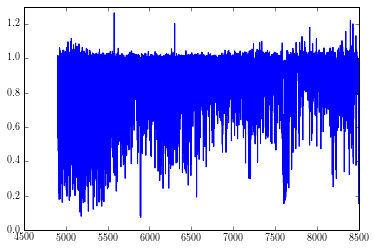

In [8]:
plt.plot(fitswaves, fitsfluxes)
plt.axis([4500, 8500, 0, 1.3])
plt.show()

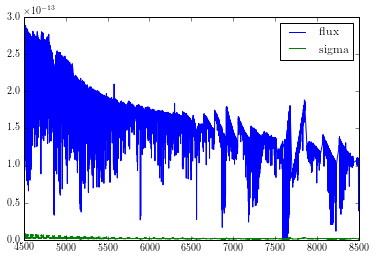

In [9]:
plt.plot(hdf5waves, hdf5fluxes, label='flux')
plt.plot(hdf5waves, hdf5sigmas, label='sigma')
plt.axis([4500, 8500, 0, 3e-13])
plt.legend()
plt.show()

One obvious difference between the two spectra is that the FITS one is continuum normalized while the HDF5 one is not! The flux values on the y-axis reflect this.
The eventual goal is to take the data from a FITS file and use it to make a new HDF5 file in the same format as our example one. However, since the HDF5 file has orders, let's find a FITS file with orders and inspect it first.

In [10]:
fitsfile2 = '151013.0003.ec.fits'
fitsspec2 = fits.open(fitsfile2)

UTMIDDLE=2015-10-13T06:41:49.78                                                  [astropy.io.fits.card]


In [11]:
fits2fluxes = fitsspec2[0].data
print(fits2fluxes)
norders = len(fitsspec2[0].data)
nfluxpts = len(fitsspec2[0].data[0])
print(norders, nfluxpts)
#print(list(fitsspec2[0].header.keys())) # the header is LONG with lots of WAT2_* values!

[[  4.28663045e-01  -4.84094083e-01  -1.53385594e-01 ...,  -2.93385220e+00
    3.76307869e+00   1.47201860e+00]
 [ -7.74344280e-02  -3.45682085e-01   1.31611404e+01 ...,  -7.61457980e-01
    1.00115623e+01   3.14754635e-01]
 [  1.32154441e+00   5.46269989e+00   2.30374241e+01 ...,   1.01545534e+01
    2.08648720e+01   1.66210251e+01]
 ..., 
 [  2.69831836e-01   6.46386743e-01  -1.92320615e-01 ...,  -1.52720049e-01
   -6.07118532e-02   1.69713482e-01]
 [  2.11701557e-01   1.37383938e-01  -1.06734589e-01 ...,   8.23027734e-03
    1.47136152e-01  -5.30480482e-02]
 [  6.76467848e+00  -3.44846517e-01  -1.60814643e+00 ...,   3.67136627e-01
   -2.97004998e-01  -4.58778322e-01]]
115 1651


This file contains 115 orders, and each order contains 1651 points. After a manual inspection of the WAT2 header entries, which are truncated to 68 characters each, I decided that concatenating it into one big `WAT2string` and then turning that into a big `WAT2list` should let us slice it up however we want. Each spectral order has 20 parameters associated with it, some of which we'll need to define each order's wavelength scale. (I admit, I'm starting to see why FITS files make people cranky.)

In [12]:
header2 = fitsspec2[0].header
# each of the 115 orders has a set of 20 useful parameters hidden in a set of 300+ WAT2 header entries
WAT2string = ''
for key in header2.keys():
    if 'WAT2_' in key:
        # build a giant string, adding a trailing space if length is not 68
        if len(header2[key]) != 68:
            #print(key, len(header2[key])) # as expected, all but the last WAT2 header entry have length 67 or 68
            WAT2string += header2[key] + ' '
        else:
            WAT2string += header2[key]

# use the giant string to create a list we can slice into orders
WAT2list = []
for item in WAT2string.split("\""):
    if 'spec' not in item:
        WAT2list.extend(item.split(' '))

lenwat = 20
norders = len(fitsspec2[0].data)

# check to make sure each order contains lenwat entries
print(WAT2list[0:lenwat]) # order 1
print(WAT2list[lenwat:2*lenwat]) # order 2
print(WAT2list[2*lenwat:3*lenwat]) # order 3
print(WAT2list[3*lenwat:4*lenwat]) # order 4 ... etc.

# assign the orders
WAT2orders = []
for idx in np.arange(0, lenwat*norders, lenwat):
    WAT2orders.append(WAT2list[idx:idx+lenwat])

print(WAT2orders[90]) # confirm this works for all the orders

['1', '53', '2', '10811.915699305', '-0.13828075594801', '1651', '0.', '1125.16', '1140.79', '1.', '0.', '1', '5', '1.', '1651.', '10699.5534672437', '-114.067636302186', '-1.71749637341347', '-0.0139873549215261', '-0.00189522199659572']
['2', '54', '2', '10611.712482255', '-0.13572111085392', '1651', '0.', '1148.98', '1179.92', '1.', '0.', '1', '5', '1.', '1651.', '10501.4302604895', '-111.956075908717', '-1.68623051115123', '-0.0138405457699193', '-0.00146417823781315']
['3', '55', '2', '10418.788889195', '-0.13325427144091', '1651', '0.', '1196.55', '1216.31', '1.', '0.', '1', '5', '1.', '1651.', '10310.5113007423', '-109.921084924288', '-1.65609644708133', '-0.0136890144644213', '-0.00108903859346431']
['4', '56', '2', '10232.754971777', '-0.13087528127186', '1651', '0.', '1237.75', '1266.61', '1.', '0.', '1', '5', '1.', '1651.', '10126.4106600649', '-107.958572629459', '-1.62703119782436', '-0.0135344198243879', '-7.64139258764965E-4']
['91', '143', '2', '4007.6724547075', '-0.05

According to the internet (http://stsdas.stsci.edu/cgi-bin/gethelp.cgi?specwcs), the format for a dispersion string like we have in "orders" is:

`specN = ap beam dtype w1 dw nw z aplow aphigh [functions_i]`.

Thus, our strings are `[ap beam dtype w1 dw nw z aplow aphigh wt_i w0_i ftype_i [parameters] [coefficients]]`.
I happen to know that the wavelength dispersion for this file is in the form of a Chebyshev polynomial rather than linear, so it is going to be a bit of a pain to reconstruct. Let's write some code to confirm this and make wavelength arrays. 

In [13]:
fits2waves = []
for idx, order in enumerate(WAT2orders):
    dtype = order[2]
    w1 = float(order[3])     # dispersion coordinate of 1st physical pixel
    dw = float(order[4])     # average dispersion interval per physical pixel
    nwave = int(order[5])    # number of wavelength points in the order
    if float(order[6]) != 0:
        raise Warning('Nonzero Doppler factor in order {0}, not accounting for this.'.format(idx))
    apmin = float(order[7])  # original pixel limits along the spatial axis, not used
    apmax = float(order[8])  # original pixel limits along the spatial axis, not used
    if dtype == '0':   # linear
        wavelengths = np.arange(nwave) * dw + w1
    elif dtype == '1': # log
        wavelengths = np.arange(nwave) * dw + w1
        wavelengths = np.power(10., wavelengths)
    elif dtype == '2': # nonlinear
        wt_i, w0_i, ftype_i = float(order[9]), float(order[10]), int(order[11])
        # ftype_i means 1 for a Chebyshev polynomial; 2-6 for other polynomials
        # ONLY CONSIDERING CHEBYSHEV FOR NOW!
        # some of the following is from https://github.com/kgullikson88/General/blob/master/readmultispec.py
        if ftype_i != 1:
            raise ValueError('Sorry, the nonlinear dispersion is not a Chebyshev polynomial.')
        cheb_order = int(order[12])
        pmin = float(order[13])
        pmax = float(order[14])
        pmiddle = (pmax + pmin) / 2
        prange = pmax - pmin
        coeffs = []
        for cidx in range(0, cheb_order):
            coeffs.append(float(order[15+cidx])) 
        xs = (np.arange(nwave, dtype=float) + 1 - pmiddle) / ((prange) / 2)        
        p0 = np.ones(nwave, dtype=float)
        p1 = xs
        wavelengths = p0 * coeffs[0] + p1 * coeffs[1]
        for i in range(2, cheb_order):
            p2 = 2 * xs * p1 - p0
            wavelengths = wavelengths + p2 * coeffs[i]
            p0 = p1
            p1 = p2
        #print(wavelengths) # it works!
    else:
        raise ValueError('Spectrum type not recognized.')
    fits2waves.append(list(wavelengths))
fits2waves = np.array(fits2waves)

Whew! All that nonsense just to get the wavelength values for each spectral order! I'm beginning to like HDF5 files more every minute. One final step before we move on: making sure the orders are sorted in increasing wavelength order.

In [14]:
for idx, (waves, fluxes) in enumerate(zip(fits2waves, fits2fluxes)):
    fits2fluxes[idx] = fluxes[np.argsort(waves)]
    fits2waves[idx] = waves[np.argsort(waves)]
print(fits2waves[0][0], fits2waves[0][-1])
print(fits2waves[-1][0], fits2waves[-1][-1])

10583.752452 10811.9156993
3359.6305746 3431.62168264


OK! The orders go from longest to shortest wavdlength, but *within each order* the wavelengths increase as we would like them to. So to recap, we have...

(115, 1651)
(115, 1651)


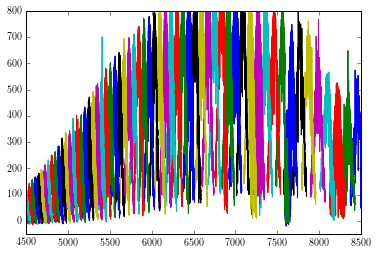

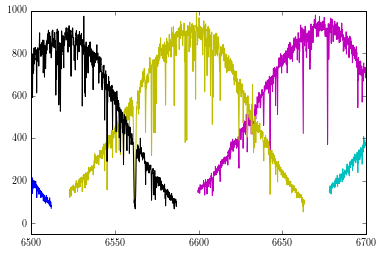

In [15]:
print(np.shape(fits2waves))
print(np.shape(fits2fluxes))
for wave, flux in zip(fits2waves, fits2fluxes):
    plt.plot(wave, flux)
plt.axis([4500, 8500, -50, 800])
plt.show()
for wave, flux in zip(fits2waves, fits2fluxes):
    plt.plot(wave, flux)
plt.axis([6500, 6700, -50, 1000])
plt.show()

Yep, that looks like a reduced-but-not-continuum-normalized echelle spectrum all right, especially when zoomed in. Both of these arrays contain 115 orders, and together they have 1651 wavelength and flux data points.
Our next step is to create an HDF5 file with this information and ensure we can access it the same way we did with the original HDF5 spectrum.

In [16]:
newhdf5file = '151013.0003.ec.hdf5'
newhdf5spec = h5py.File(newhdf5file, 'w')

In [17]:
# we want ['fls', 'sigmas', 'wls'] in datasets (not groups) in the HDF5 file
# we'll just use sqrt(flux) for the sigmas, because Poisson noise is real, right?

fits2sigmas = []
for fluxes in fits2fluxes:
    sigmas = np.sqrt(np.abs(fluxes))
    fits2sigmas.append(sigmas)
fits2sigmas = np.array(fits2sigmas)

flshdf5 = newhdf5spec.create_dataset('fls', data=fits2fluxes)
sigmashdf5 = newhdf5spec.create_dataset('sigmas', data=fits2sigmas)
wlshdf5 = newhdf5spec.create_dataset('wls', data=fits2waves)

In [18]:
print(newhdf5spec)
print(list(newhdf5spec))
print(len(newhdf5spec['wls']), len(newhdf5spec['fls']))
print('shape:', flshdf5.shape)
print('dtype:', flshdf5.dtype)
print('name:', flshdf5.name)
print('parent:', flshdf5.parent)
print('file:', flshdf5.file)

<HDF5 file "151013.0003.ec.hdf5" (mode r+)>
['fls', 'sigmas', 'wls']
115 115
shape: (115, 1651)
dtype: >f4
name: /fls
parent: <HDF5 group "/" (3 members)>
file: <HDF5 file "151013.0003.ec.hdf5" (mode r+)>


I think my HDF5 file has data in it! This is a good opportunity to be responsible and close all the files we've opened.

In [19]:
newhdf5spec.close()
hdf5spec.close()
fitsspec.close()
fitsspec2.close()

Just to be sure, let's compare the structure of this new file to the example HDF5 one.

In [20]:
hdf5spec1 = h5py.File(hdf5file)
hdf5spec2 = h5py.File(newhdf5file)
print(list(hdf5spec1), list(hdf5spec2))

['fls', 'sigmas', 'wls'] ['fls', 'sigmas', 'wls']


(51, 2298) (115, 1651)
float32 >f4
/fls /fls
<HDF5 group "/" (3 members)> <HDF5 group "/" (3 members)>
[ 6447.90783691  6447.9972317   6448.08662003 ...,  6586.70090435
  6586.78015185  6586.85939365]
[ 135.71414185  125.0881424   123.88703156 ...,   79.49198151   98.8398056
   84.05171967]
[ 11.64964104  11.18428135  11.13045502 ...,   8.91582775   9.9418211
   9.16797256]


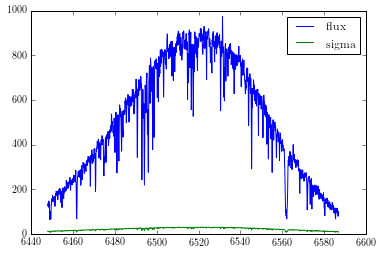

In [21]:
print(hdf5spec1['fls'].shape, hdf5spec2['fls'].shape)
print(hdf5spec1['fls'].dtype, hdf5spec2['fls'].dtype)
print(hdf5spec1['fls'].name, hdf5spec2['fls'].name)
print(hdf5spec1['fls'].parent, hdf5spec2['fls'].parent)
print(hdf5spec2['wls'][34])
print(hdf5spec2['fls'][34])
print(hdf5spec2['sigmas'][34])
plt.plot(hdf5spec2['wls'][34], hdf5spec2['fls'][34], label='flux')
plt.plot(hdf5spec2['wls'][34], hdf5spec2['sigmas'][34], label='sigma')
plt.legend()
plt.show()

Excellent! We can even see the H-alpha line exists!

Only a few loose threads: I haven't done any continuum fitting of each echelle order, I'm not sure if the difference in `float32` vs `>f4` matters for `dtype` or not, and I did not figure out a way to save any info from the FITS header in the new HDF5 file.

The end.

In [22]:
hdf5spec1.close()
hdf5spec2.close()